In [57]:
from sklearn import preprocessing

#Generating the Gaussion Naive Bays model
from sklearn.naive_bayes import GaussianNB

In [71]:
# Assign features and encoading Labels

Weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy', 'Sunny']

Humidity = ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium']

Batfirst = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

print(Weather,"\n\n\t", Batfirst)

['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy', 'Sunny'] 

	 ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']


In [72]:
# Creating LabelEncoder

le = preprocessing.LabelEncoder()

#Converting string labels into numbers
Weather_encoded = le.fit_transform(Weather)
hum_encoded = le.fit_transform(Humidity)
label = le.fit_transform(Batfirst)

print(Weather_encoded, hum_encoded, label)

[2 2 0 1 1 0 2 2 1 2 0 0 1 2] [0 0 0 2 1 1 1 2 1 2 2 2 0 2] [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [73]:
# Combining Weather and Humidity in a single tuple as features

features = list(zip(Weather_encoded, hum_encoded))
features

[(2, 0),
 (2, 0),
 (0, 0),
 (1, 2),
 (1, 1),
 (0, 1),
 (2, 1),
 (2, 2),
 (1, 1),
 (2, 2),
 (0, 2),
 (0, 2),
 (1, 0),
 (2, 2)]

In [74]:
# Creat a Guassion Classifier
model = GaussianNB()
model.fit(features,label)

GaussianNB()

In [75]:
print("Enter Weather and Humidity Condition: ")
w,h=map(int, input().split())

Enter Weather and Humidity Condition: 
0 0


# Predict Output

In [76]:

predicted= model.predict([[w,h]])
if predicted==1:
    print("yes")
else:
    print("no")

yes


In [79]:
print("Enter Weather and Humidity Condition: ")
w, h = map(int, input().split())

Predicted= model.predict([[w,h]])
if Predicted==1:
    print("Yes")
else:
    print("No")


Enter Weather and Humidity Condition: 
0 0
Yes


# DECISION_TREE

## Importing Essential Liberies

In [81]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import metrics

# Load the Dataset

In [82]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
Y = pd.Categorical.from_codes(iris.target, iris.target_names)

# Exploring Data

In [83]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
Y = pd.get_dummies(Y)

# Split the data into training/testing sets

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# Generating Model

In [87]:
dt = DecisionTreeClassifier()

# Train the model using the training data

In [88]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

# Visualize Desion Tree

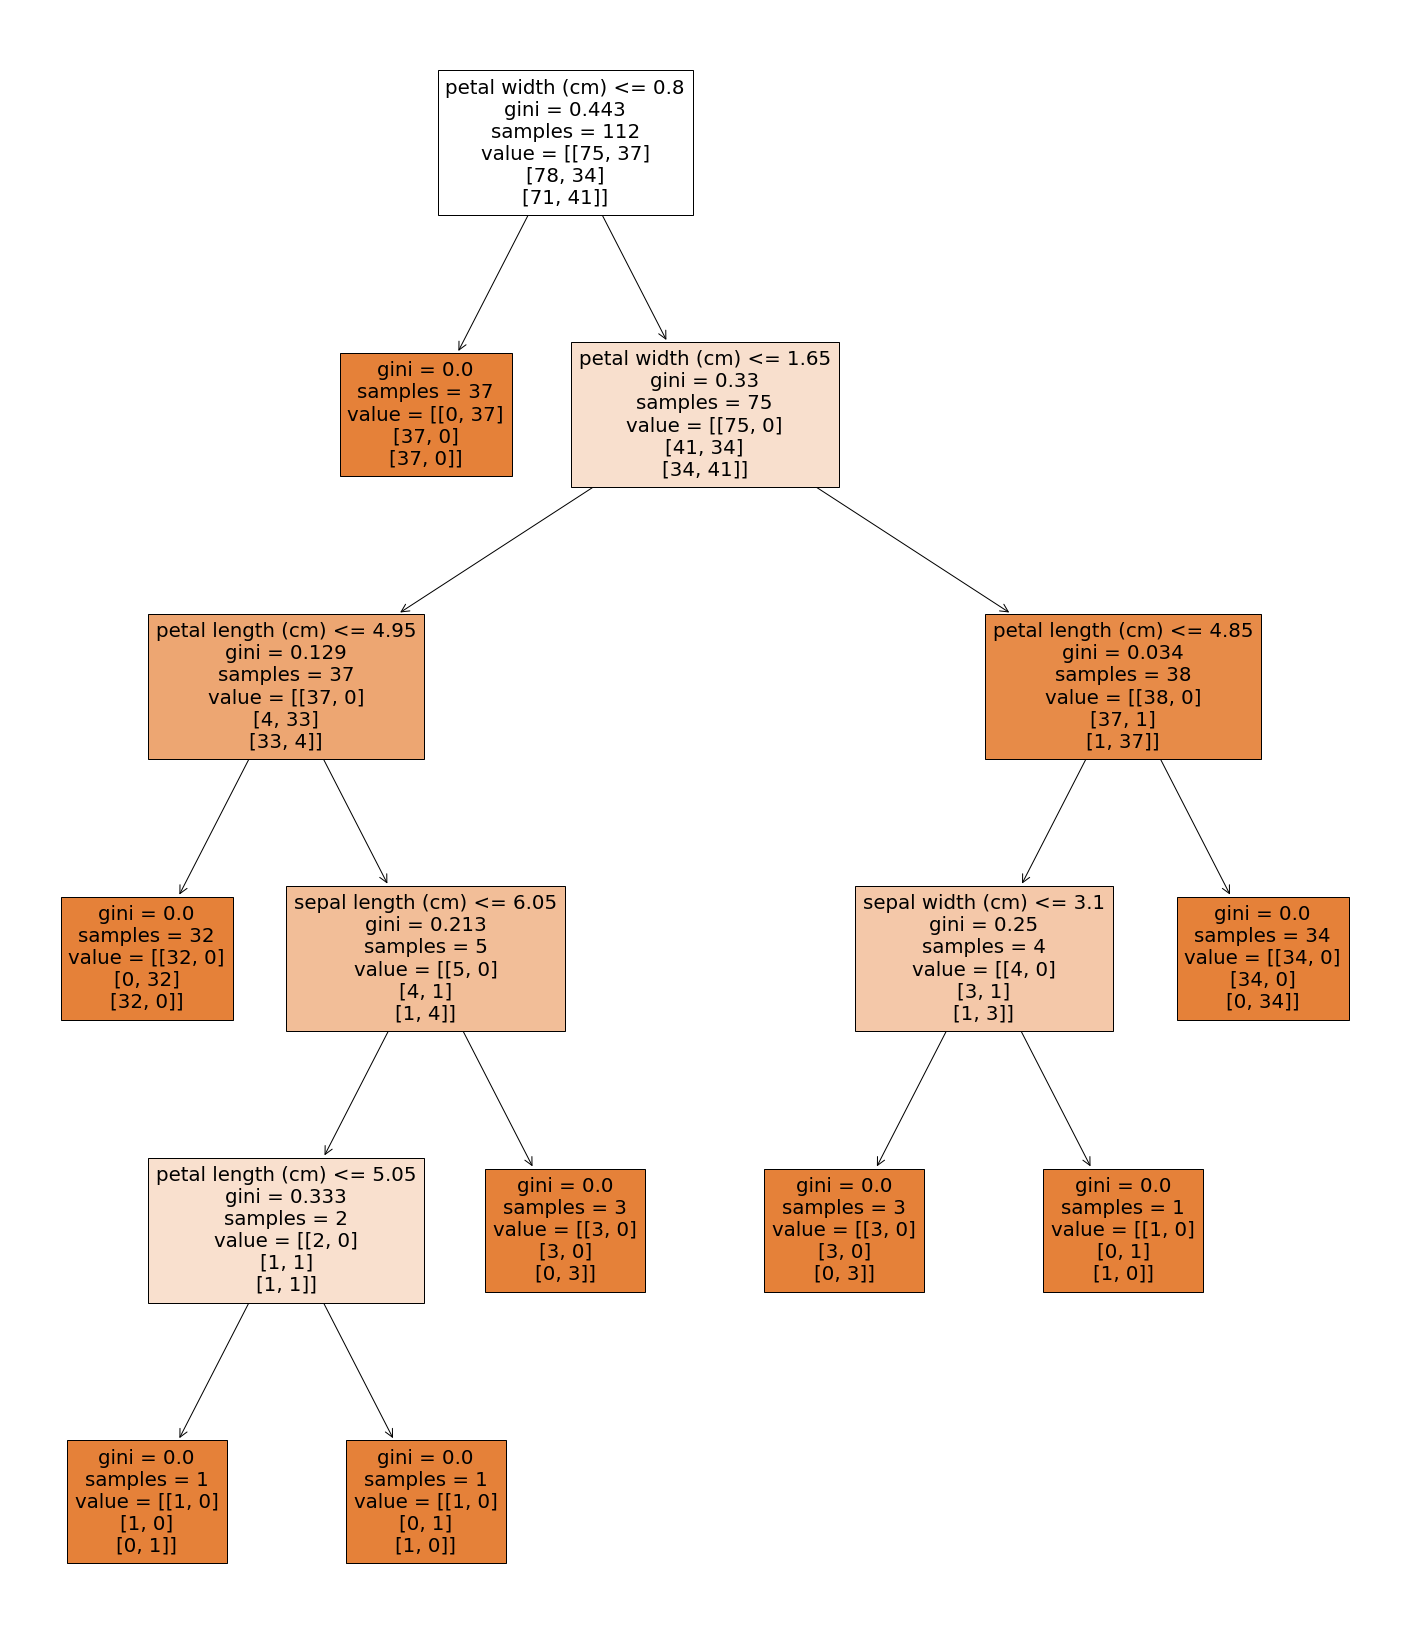

In [90]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,30))
_ = tree.plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

# Predict the response for test Dataset

In [91]:
Y_pred = dt.predict(X_test)

# Evaluating the Model

In [92]:
#Numbers on the diogonal of the confusion matrix correspond to correct prediction

species = np.array(Y_test).argmax(axis=1)
predictions = np.array(Y_pred).argmax(axis=1)
confusion_matrix(species, predictions)   

# matrics can be made better way by the seaborn heat map

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)